<a href="https://colab.research.google.com/github/ladkrutarth/REAL_VS_Fake_NEWS_Classification-Model/blob/main/REAL_VS_Fake_NEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaray

In [90]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loding Dataset From CSV file

In [70]:

df = pd.read_csv("news.csv")

print(df)


      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

# Data Processing

1.   Data Cleaning
2.   Filled Null Values
3.  Save Clean Data in CSV file







In [71]:


# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


# Handle missing values
df['title'].fillna('', inplace=True)
df['text'].fillna('', inplace=True)

# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply the cleaning function
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

df = df.drop('Unnamed: 0', axis=1)


# Save cleaned data
df.to_csv('cleaned_file.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-71-85c4dd2806ef>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('', inplace=True)
<ipython-input-71-85c4dd2806ef>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

In [72]:
df = pd.read_csv("cleaned_file.csv")

df

,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,REAL
3,bernie supporter twitter erupt anger dnc tried...,kaydee king kaydeeking november lesson tonight...,FAKE
4,battle new york primary matter,primary day new york frontrunners hillary clin...,REAL
...,...,...,...
6330,state department say cant find email clinton s...,state department told republican national comm...,REAL
6331,p pb stand plutocratic pentagon,p pb stand plutocratic pentagon posted oct wik...,FAKE
6332,antitrump protester tool oligarchy information,antitrump protester tool oligarchy reform alwa...,FAKE
6333,ethiopia obama seek progress peace security ea...,addis ababa ethiopia president obama convened ...,REAL


# Normalize Data

In [85]:


# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("cleaned_file.csv")

# --- The fix ---
# Replace NaN values with empty strings after reading the cleaned CSV
df['text'] = df['text'].fillna('')
df['title'] = df['title'].fillna('')
# --- End of fix ---

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])


# Convert labels ('real' and 'fake') to numeric (1 for 'real', 0 for 'fake')
y = df['label'].map({'REAL': 1, 'FAKE': 0})

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,REAL
3,bernie supporter twitter erupt anger dnc tried...,kaydee king kaydeeking november lesson tonight...,FAKE
4,battle new york primary matter,primary day new york frontrunners hillary clin...,REAL
...,...,...,...
6330,state department say cant find email clinton s...,state department told republican national comm...,REAL
6331,p pb stand plutocratic pentagon,p pb stand plutocratic pentagon posted oct wik...,FAKE
6332,antitrump protester tool oligarchy information,antitrump protester tool oligarchy reform alwa...,FAKE
6333,ethiopia obama seek progress peace security ea...,addis ababa ethiopia president obama convened ...,REAL


# Split Data into train and test set

In [100]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Implement classification Model & Evaluating

Accuracy: 91.10%
[[1483   76]
 [ 206 1403]]


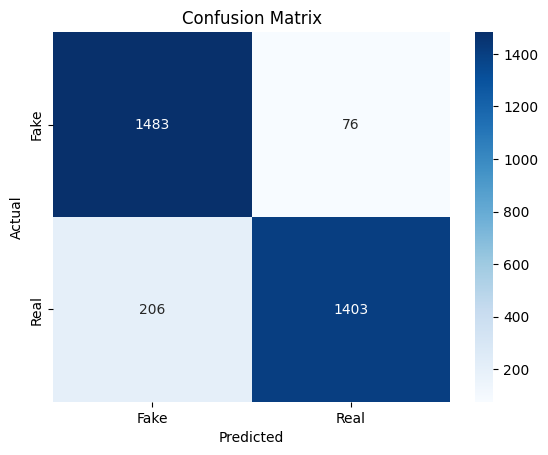

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1559
           1       0.95      0.87      0.91      1609

    accuracy                           0.91      3168
   macro avg       0.91      0.91      0.91      3168
weighted avg       0.91      0.91      0.91      3168



In [99]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

print(cm)


# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [110]:
from sklearn.model_selection import KFold

# Define the number of folds for k-fold cross-validation
n_splits = 5  # You can change this to any desired number of folds

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) # Setting random_state for reproducibility

# Store accuracy scores for each fold
fold_accuracies = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train your model (e.g., Logistic Regression)
    model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)  # Store accuracy for this fold
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    print("-" * 20)

Fold 1
Accuracy: 0.9123914759273876
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       628
           1       0.94      0.89      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

--------------------
Fold 2
Accuracy: 0.9037095501183899
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       657
           1       0.95      0.85      0.89       610

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.91      0.90      0.90      1267

--------------------
Fold 3
Accuracy: 0.9021310181531176
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       634
           1       0.93      0.87      0.90       633

    accuracy                    